In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# 데이터 로드

# 구조, 요약통계량 확인

# 산점도 행렬

# 스케일링

# 분석 수행

# 결과 통계량 확인

# 결과 시각화

In [5]:
# 데이터 로드
housing = fetch_california_housing()
X = housing.data
feature_names = housing.feature_names

# 데이터프레임 생성
df = pd.DataFrame(X, columns=feature_names)

# 1. 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 2. PCA 수행
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [7]:
# 3. 설명된 분산 비율 계산
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [8]:
# 4. 시각화
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Explained Variance Ratio')

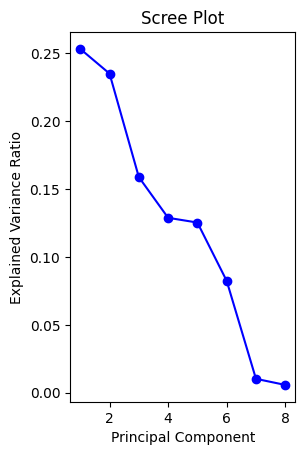

In [9]:
# 4-1. 스크리 플롯
plt.subplot(121)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

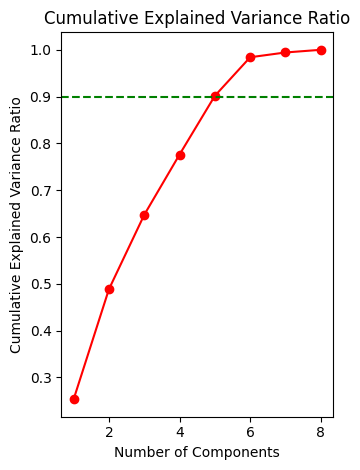

In [10]:
# 4-2. 누적 분산 비율
plt.subplot(122)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.axhline(y=0.9, color='g', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.tight_layout()
plt.show()

In [11]:
# 5. 주성분 적재량(Component loadings) 확인
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(feature_names))],
    index=feature_names
)

print("\nPrincipal Component Loadings:")
print(loadings)


Principal Component Loadings:
                 PC1       PC2       PC3       PC4       PC5       PC6  \
MedInc      0.077462  0.229879  0.218222  0.885294 -0.002603  0.149818   
HouseAge    0.007318 -0.260786 -0.627551  0.109898  0.222936  0.683931   
AveRooms    0.439142  0.546687 -0.063999  0.046402  0.029852  0.095054   
AveBedrms   0.399996  0.501850 -0.191848 -0.338144  0.050922  0.086854   
Population -0.171783  0.100626  0.650375 -0.283207  0.008078  0.675226   
AveOccup   -0.014644  0.002621  0.157727 -0.004918  0.972669 -0.169410   
Latitude    0.568364 -0.374011  0.192600 -0.062214 -0.022761 -0.042069   
Longitude  -0.536974  0.422387 -0.180824 -0.059846  0.011807 -0.082551   

                 PC7       PC8  
MedInc      0.169238  0.242271  
HouseAge   -0.081035  0.044846  
AveRooms   -0.530662 -0.458814  
AveBedrms   0.531566  0.379875  
Population -0.031676  0.013170  
AveOccup    0.003246 -0.008959  
Latitude   -0.431797  0.554415  
Longitude  -0.461698  0.526165  


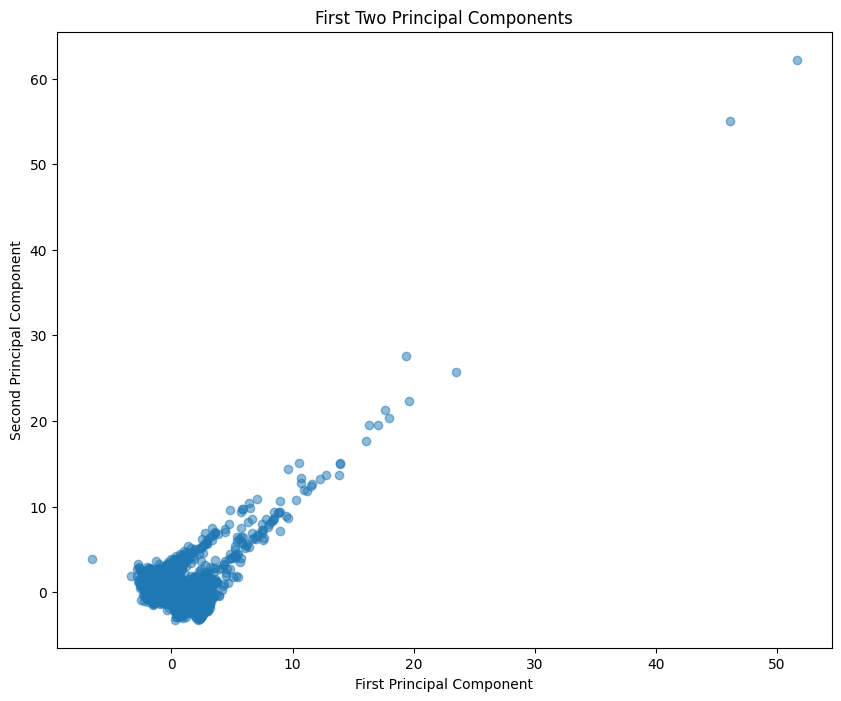

In [12]:
# 6. 첫 두 개의 주성분으로 산점도 그리기
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [13]:
# 7. 결과 요약
print("\nExplained Variance Ratio by Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({cumulative_variance_ratio[i]:.4f} cumulative)")


Explained Variance Ratio by Component:
PC1: 0.2534 (0.2534 cumulative)
PC2: 0.2352 (0.4885 cumulative)
PC3: 0.1589 (0.6474 cumulative)
PC4: 0.1289 (0.7763 cumulative)
PC5: 0.1254 (0.9017 cumulative)
PC6: 0.0824 (0.9841 cumulative)
PC7: 0.0102 (0.9943 cumulative)
PC8: 0.0057 (1.0000 cumulative)



Correlation between PC scores:
     PC1  PC2  PC3
PC1  1.0  0.0  0.0
PC2  0.0  1.0 -0.0
PC3  0.0 -0.0  1.0


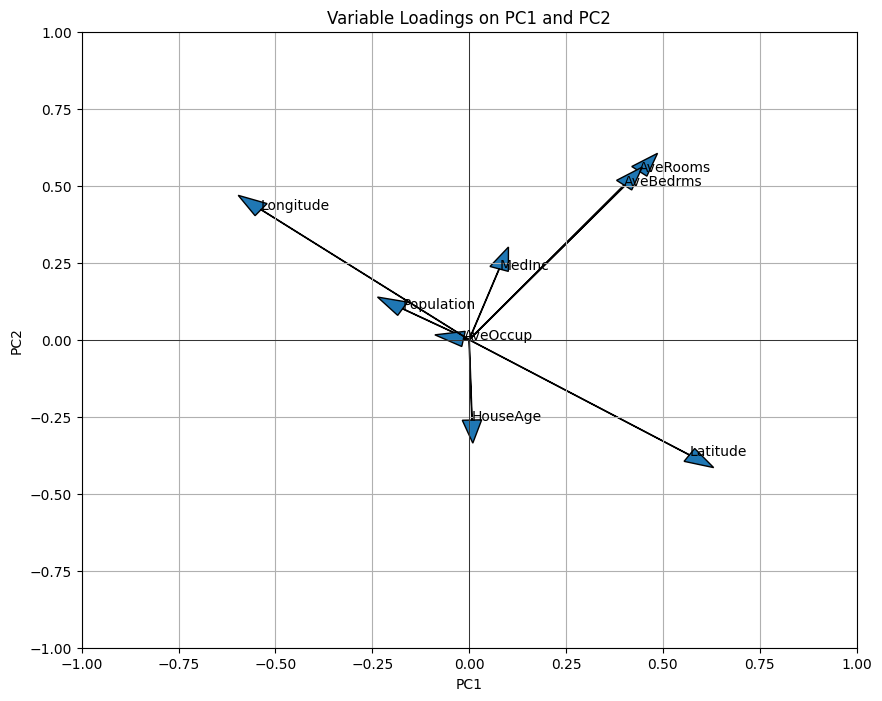

In [18]:
# 주성분 점수 간의 상관관계 확인
pc_scores = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print("\nCorrelation between PC scores:")
print(pc_scores.iloc[:, :3].corr().round(4))

# 원본 변수들의 주성분에 대한 로딩 시각화
plt.figure(figsize=(10, 8))
for i in range(len(feature_names)):
    plt.arrow(0, 0, 
             loadings.iloc[i, 0], 
             loadings.iloc[i, 1],
             head_width=0.05)
    plt.text(loadings.iloc[i, 0], 
             loadings.iloc[i, 1], 
             feature_names[i])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.title('Variable Loadings on PC1 and PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [14]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
from factor_analyzer.rotator import Rotator

In [15]:
# 8. Rotation 분석
n_components = 3  # 회전할 주성분 수 지정

# 8-1. Varimax Rotation
rotator_varimax = Rotator(method='varimax')
loadings_varimax = rotator_varimax.fit_transform(pca.components_[:n_components].T)

# 8-2. Promax Rotation
rotator_promax = Rotator(method='promax')
loadings_promax = rotator_promax.fit_transform(pca.components_[:n_components].T)

# 8-3. Oblimin Rotation
rotator_oblimin = Rotator(method='oblimin')
loadings_oblimin = rotator_oblimin.fit_transform(pca.components_[:n_components].T)


In [16]:
# 결과를 데이터프레임으로 변환
df_varimax = pd.DataFrame(
    loadings_varimax,
    columns=[f'RC{i+1}' for i in range(n_components)],
    index=feature_names
)

df_promax = pd.DataFrame(
    loadings_promax,
    columns=[f'RC{i+1}' for i in range(n_components)],
    index=feature_names
)

df_oblimin = pd.DataFrame(
    loadings_oblimin,
    columns=[f'RC{i+1}' for i in range(n_components)],
    index=feature_names
)

# 결과 출력
print("\nVarimax Rotation Loadings:")
print(df_varimax)
print("\nPromax Rotation Loadings:")
print(df_promax)
print("\nOblimin Rotation Loadings:")
print(df_oblimin)



Varimax Rotation Loadings:
                 RC1       RC2       RC3
MedInc     -0.016416  0.193355  0.262317
HouseAge    0.000996 -0.104177 -0.671587
AveRooms    0.019556  0.702800  0.038708
AveBedrms  -0.016910  0.663299 -0.091669
Population -0.033900 -0.124131  0.667881
AveOccup    0.025390 -0.030627  0.153351
Latitude    0.706190  0.025609  0.025619
Longitude  -0.706090  0.029409 -0.004707

Promax Rotation Loadings:
                 RC1       RC2       RC3
MedInc     -0.017567  0.181774  0.253943
HouseAge    0.012382 -0.074009 -0.668923
AveRooms    0.034069  0.704555  0.003652
AveBedrms  -0.000654  0.669813 -0.124685
Population -0.050216 -0.156008  0.677047
AveOccup    0.021642 -0.037036  0.155050
Latitude    0.707168  0.044135  0.013558
Longitude  -0.706296  0.010166  0.004698

Oblimin Rotation Loadings:
                 RC1       RC2       RC3
MedInc     -0.011535  0.193706  0.267531
HouseAge   -0.013963 -0.104926 -0.674081
AveRooms    0.016001  0.703097  0.056031
AveBedrms  -0.0

/tmp/ipykernel_437665/3286265521.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df_varimax['RC1'][i], df_varimax['RC2'][i]))
/tmp/ipykernel_437665/3286265521.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df_promax['RC1'][i], df_promax['RC2'][i]))
/tmp/ipykernel_437665/3286265521.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df_oblimin['RC1'][i], df_oblimin['

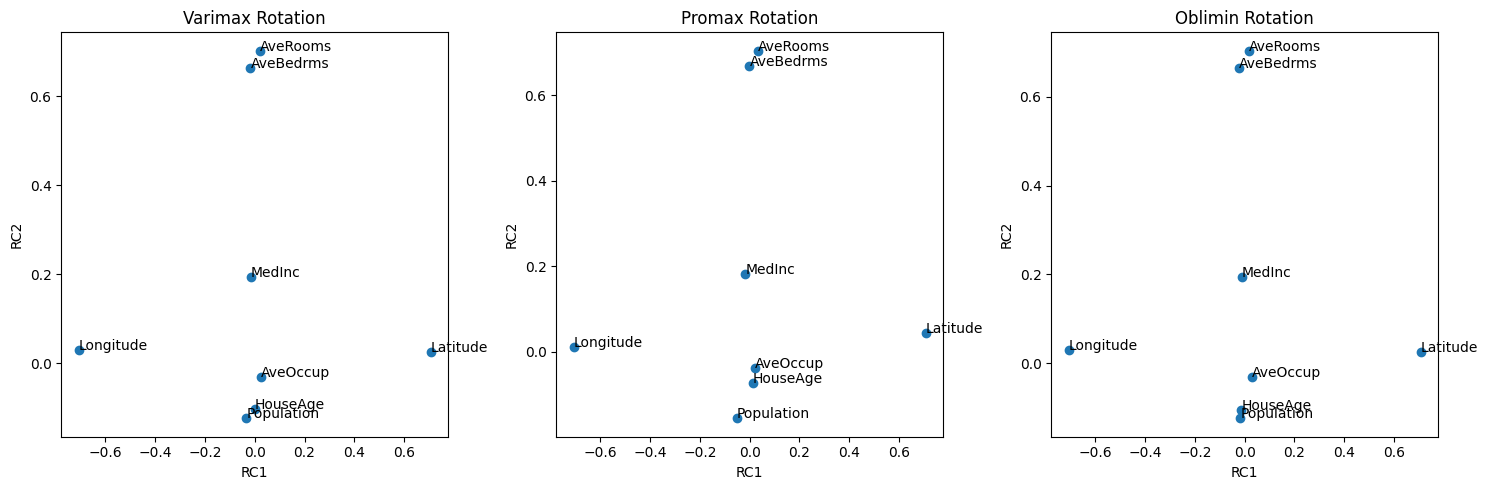

In [ ]:
# 시각화: 첫 두 회전 성분의 적재량 비교
plt.figure(figsize=(15, 5))

# Varimax
plt.subplot(131)
plt.scatter(df_varimax['RC1'], df_varimax['RC2'])
for i, txt in enumerate(feature_names):
    plt.annotate(txt, (df_varimax['RC1'][i], df_varimax['RC2'][i]))
plt.title('Varimax Rotation')
plt.xlabel('RC1')
plt.ylabel('RC2')

# Promax
plt.subplot(132)
plt.scatter(df_promax['RC1'], df_promax['RC2'])
for i, txt in enumerate(feature_names):
    plt.annotate(txt, (df_promax['RC1'][i], df_promax['RC2'][i]))
plt.title('Promax Rotation')
plt.xlabel('RC1')
plt.ylabel('RC2')

# Oblimin
plt.subplot(133)
plt.scatter(df_oblimin['RC1'], df_oblimin['RC2'])
for i, txt in enumerate(feature_names):
    plt.annotate(txt, (df_oblimin['RC1'][i], df_oblimin['RC2'][i]))
plt.title('Oblimin Rotation')
plt.xlabel('RC1')
plt.ylabel('RC2')

plt.tight_layout()
plt.show()

In [21]:
# 원본 PCA 로딩값의 분포 확인
print("\nOriginal PCA loadings distribution:")
print(abs(loadings.iloc[:, :3]).describe())

# Varimax 회전 후 로딩값의 분포 확인
print("\nVarimax rotated loadings distribution:")
print(abs(df_varimax).describe())

# promax 회전 후 로딩값의 분포 확인
print("\nPromax rotated loadings distribution:")
print(abs(df_promax).describe())

# oblimin 회전 후 로딩값의 분포 확인
print("\nOblimin rotated loadings distribution:")
print(abs(df_oblimin).describe())


# 각 변수별로 가장 높은 로딩값을 가진 성분 확인
print("\nDominant component for each variable:")
print("Original PCA:")
print(loadings.iloc[:, :3].abs().idxmax(axis=1))
print("\nAfter Varimax rotation:")
print(df_varimax.abs().idxmax(axis=1))
print("\nAfter Promax rotation:")
print(df_promax.abs().idxmax(axis=1))
print("\nAfter Oblimin rotation:")
print(df_oblimin.abs().idxmax(axis=1))


Original PCA loadings distribution:
            PC1       PC2       PC3
count  8.000000  8.000000  8.000000
mean   0.276961  0.304856  0.285393
std    0.234929  0.191425  0.223097
min    0.007318  0.002621  0.063999
25%    0.061758  0.197565  0.175050
50%    0.285889  0.317398  0.192224
75%    0.463600  0.442252  0.320554
max    0.568364  0.546687  0.650375

Varimax rotated loadings distribution:
            RC1       RC2       RC3
count  8.000000  8.000000  8.000000
mean   0.190681  0.234176  0.239480
std    0.318283  0.283169  0.278053
min    0.000996  0.025609  0.004707
25%    0.016786  0.030323  0.035435
50%    0.022473  0.114154  0.122510
75%    0.201947  0.310841  0.363708
max    0.706190  0.702800  0.671587

Promax rotated loadings distribution:
            RC1       RC2       RC3
count  8.000000  8.000000  8.000000
mean   0.193749  0.234687  0.237694
std    0.316960  0.285533  0.282376
min    0.000654  0.010166  0.003652
25%    0.016270  0.042360  0.011343
50%    0.027856  0.1

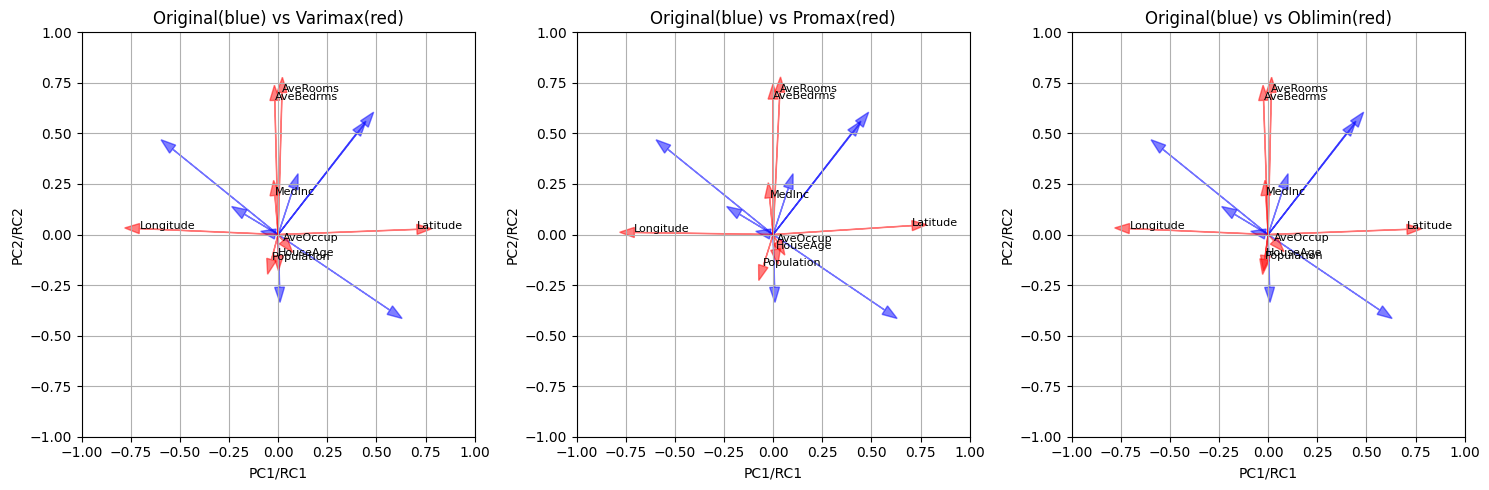

In [25]:
# 원본 vs 회전 후 로딩값 비교 시각화
plt.figure(figsize=(15, 5))

# 1. Original vs Varimax
plt.subplot(131)
# 원본 PCA 로딩 (파란색)
for i in range(len(feature_names)):
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1],
              color='blue', alpha=0.5, head_width=0.05)
# Varimax 로딩 (빨간색)
for i in range(len(feature_names)):
    plt.arrow(0, 0, df_varimax.iloc[i, 0], df_varimax.iloc[i, 1],
              color='red', alpha=0.5, head_width=0.05)
    plt.text(df_varimax.iloc[i, 0], df_varimax.iloc[i, 1],
             feature_names[i], fontsize=8)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.title('Original(blue) vs Varimax(red)')
plt.xlabel('PC1/RC1')
plt.ylabel('PC2/RC2')

# 2. Original vs Promax
plt.subplot(132)
# 원본 PCA 로딩
for i in range(len(feature_names)):
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1],
              color='blue', alpha=0.5, head_width=0.05)
# Promax 로딩
for i in range(len(feature_names)):
    plt.arrow(0, 0, df_promax.iloc[i, 0], df_promax.iloc[i, 1],
              color='red', alpha=0.5, head_width=0.05)
    plt.text(df_promax.iloc[i, 0], df_promax.iloc[i, 1],
             feature_names[i], fontsize=8)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.title('Original(blue) vs Promax(red)')
plt.xlabel('PC1/RC1')
plt.ylabel('PC2/RC2')

# 3. Original vs Oblimin
plt.subplot(133)
# 원본 PCA 로딩
for i in range(len(feature_names)):
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1],
              color='blue', alpha=0.5, head_width=0.05)
# Oblimin 로딩
for i in range(len(feature_names)):
    plt.arrow(0, 0, df_oblimin.iloc[i, 0], df_oblimin.iloc[i, 1],
              color='red', alpha=0.5, head_width=0.05)
    plt.text(df_oblimin.iloc[i, 0], df_oblimin.iloc[i, 1],
             feature_names[i], fontsize=8)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.title('Original(blue) vs Oblimin(red)')
plt.xlabel('PC1/RC1')
plt.ylabel('PC2/RC2')

plt.tight_layout()
plt.show()

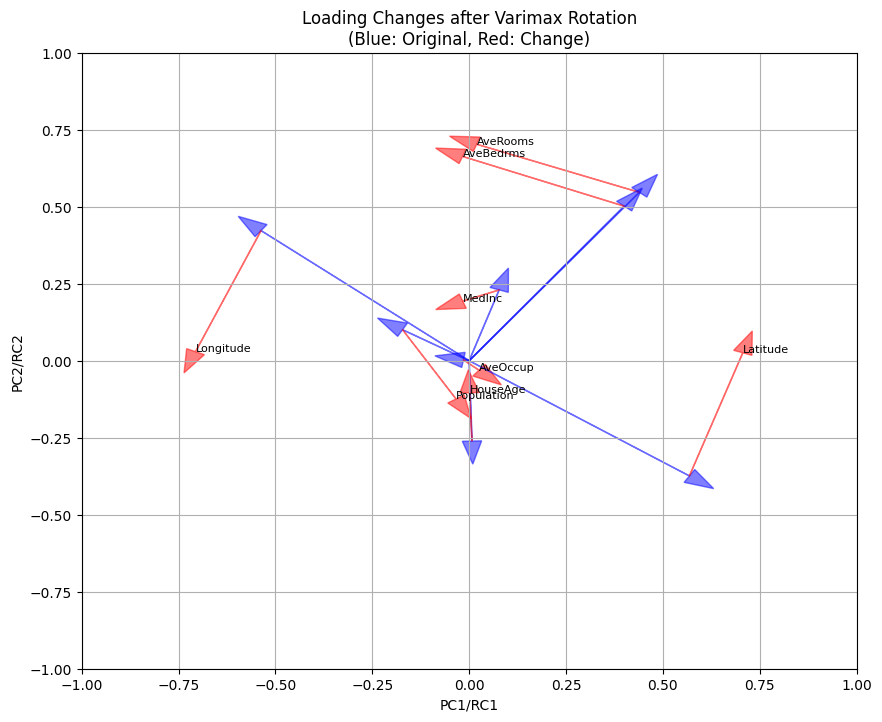

In [26]:
# 로딩값 차이 계산 및 시각화
plt.figure(figsize=(10, 8))
for i in range(len(feature_names)):
    # 원점에서 원본 로딩값까지 화살표
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1],
              color='blue', alpha=0.5, head_width=0.05)
    # 원본에서 회전 후 로딩값까지 변화 화살표
    plt.arrow(loadings.iloc[i, 0], loadings.iloc[i, 1],
              df_varimax.iloc[i, 0] - loadings.iloc[i, 0],
              df_varimax.iloc[i, 1] - loadings.iloc[i, 1],
              color='red', alpha=0.5, head_width=0.05)
    plt.text(df_varimax.iloc[i, 0], df_varimax.iloc[i, 1],
             feature_names[i], fontsize=8)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.title('Loading Changes after Varimax Rotation\n(Blue: Original, Red: Change)')
plt.xlabel('PC1/RC1')
plt.ylabel('PC2/RC2')
plt.show()

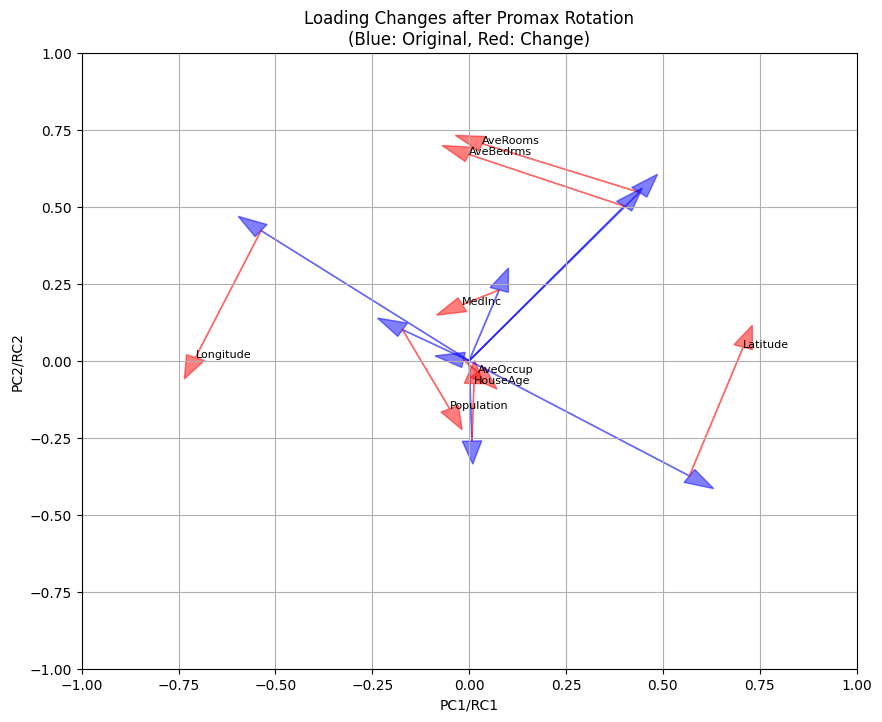

In [27]:
# Promax 회전 후 로딩값 변화 시각화
plt.figure(figsize=(10, 8))
for i in range(len(feature_names)):
    # 원점에서 원본 로딩값까지 화살표
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1],
              color='blue', alpha=0.5, head_width=0.05)
    # 원본에서 회전 후 로딩값까지 변화 화살표
    plt.arrow(loadings.iloc[i, 0], loadings.iloc[i, 1],
              df_promax.iloc[i, 0] - loadings.iloc[i, 0],
              df_promax.iloc[i, 1] - loadings.iloc[i, 1],
              color='red', alpha=0.5, head_width=0.05)
    plt.text(df_promax.iloc[i, 0], df_promax.iloc[i, 1],
             feature_names[i], fontsize=8)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.title('Loading Changes after Promax Rotation\n(Blue: Original, Red: Change)')
plt.xlabel('PC1/RC1')
plt.ylabel('PC2/RC2')
plt.show()

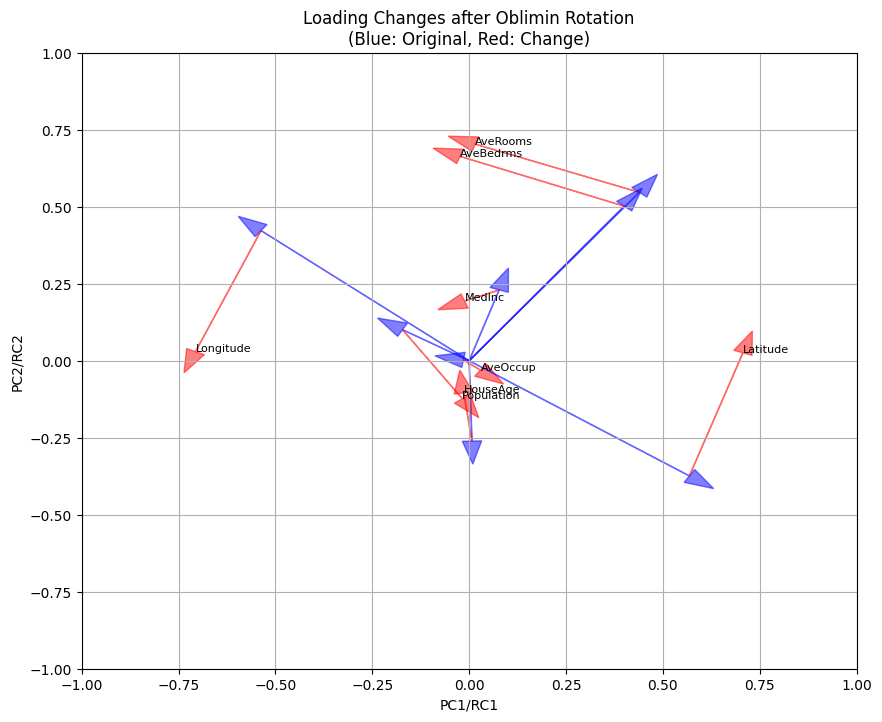

In [28]:
# Oblimin 회전 후 로딩값 변화 시각화
plt.figure(figsize=(10, 8))
for i in range(len(feature_names)):
    # 원점에서 원본 로딩값까지 화살표
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1],
              color='blue', alpha=0.5, head_width=0.05)
    # 원본에서 회전 후 로딩값까지 변화 화살표
    plt.arrow(loadings.iloc[i, 0], loadings.iloc[i, 1],
              df_oblimin.iloc[i, 0] - loadings.iloc[i, 0],
              df_oblimin.iloc[i, 1] - loadings.iloc[i, 1],
              color='red', alpha=0.5, head_width=0.05)
    plt.text(df_oblimin.iloc[i, 0], df_oblimin.iloc[i, 1],
             feature_names[i], fontsize=8)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.title('Loading Changes after Oblimin Rotation\n(Blue: Original, Red: Change)')
plt.xlabel('PC1/RC1')
plt.ylabel('PC2/RC2')
plt.show()